<a href="https://colab.research.google.com/github/gggggeun/study/blob/main/1.%20%EC%A0%95%ED%99%95%EB%8F%84(Accuracy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분류의 평가지표 (1) 정확도

정확도는 실제 데이터와 예측 데이터를 비교했을 때 얼마나 같은지를 판단하는 지표이다.

직관적으로 모델 예측 성능을 나타낸다고 볼 수 있다. 하지만 이진 분류의 경우 데이터 구성에 따라 모델의 성능을 왜곡할 수 있기 때문에 다른 평가지표와 함께 봐야한다.

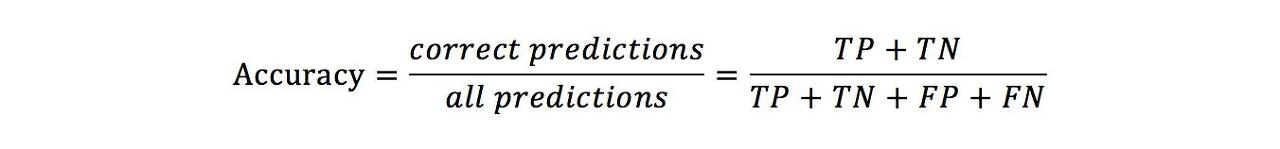

🎯 정확도만으로 평가가 충분하지 않은 이유

https://laptrinhx.com/confusion-matrix-accuracy-precision-recall-f1-score-2087412546/

만약 데이터셋의 label값이 불균형(unbalance)한 경우엔 정확도는 좋은 측정을 할 수 없다.

예를 들면 90명의 건강한사람과 10명의 환자가 있을 경우, 머신러닝이 모든 사람을 건강한 사람으로 예측할 경우에도 정확도는 90%가 된다.

정확도는 90%이지만, 이 모델은 환자 10명 모두가 건강하다고 분류되기 때문에 좋은 모델은 아니다.

이렇게 불균형한 데이터셋일 경우에는 정확도만으로 올바른 평가를 할 수 없게된다.

## 불균형한 레이블 (Unbalanced label set) - titanic

여성이면 무조건 생존(1)일 경우의 Accuracy(정확도)

In [ ]:
import pandas as pd
from google.colab import files
files.upload()

In [ ]:
df = pd.read_csv('train (1).csv')

In [ ]:
# 필요없는 feature 제거
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
# 결측값 정리
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Cabin'].fillna('N', inplace=True)
df['Embarked'].fillna('N', inplace=True)
print('총 결측치 수:',df.isnull().sum().sum())
# 문자열 정리
df['Cabin'] = df['Cabin'].str[:1]
# 인코딩
from sklearn import preprocessing
def encode_features(dataDF):
  features = ['Cabin','Sex','Embarked']
  for feature in features :
    le = preprocessing.LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])
  return dataDF
df = encode_features(df)
df.head(3)

총 결측치 수: 0


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,7,3
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,7,3


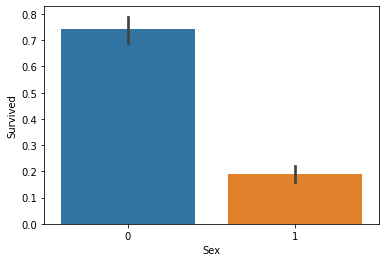

In [ ]:
# 성별에 따른 생존율(0=female)
sns.barplot(x='Sex',y='Survived',data=df)

In [ ]:
from sklearn.base import BaseEstimator
import numpy as np

class MyDummyClassifier(BaseEstimator):
  #fit() 사용x (학습하지 않음)
  def fit(self, X, y=None):
    pass
  #predict() 단순히 Sex feature 가 1이면 0, 그렇지 않으면 1로 예측함.
  def predict(self, X):
    pred = np.zeros((X.shape[0],1))
    for i in range (X.shape[0]) :
      if X['Sex'].iloc[i] ==1:
        pred[i] = 0
      else :
        pred[i] = 1

    return pred


In [ ]:
# 무조건 여성일 경우 '생존'으로 예측해보기

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
target = df['Survived']
features = df.drop('Survived', axis=1)
X_train, X_test,y_train, y_test = train_test_split(features, target, 
                                                   test_size=0.2, random_state=10)
#Dummy Classifier로 학습/예측/정확도 평가
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

# 위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행
mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는:{:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는:0.8212


여성이면 무조건 '생존' 으로 예측할 경우 test set의 정확도 가 82% 나왔다.
불균형한 레이블 값 분포에서 머신러닝 모델의 성능을 판단한 경우, 정확도(Accuracy)는 적합한 평가 지표가 아님을 보여준다.


---

